In [1]:
# initial set up
import tensorflow as tf
import tensorflow.keras
import numpy as np
import os
from glob import glob
import cv2
from sklearn.model_selection import train_test_split
from PIL import Image
import skimage
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [55]:
# setting a gpu
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
gpus= tf.config.list_physical_devices('GPU')
print(gpus)
tf.config.experimental.set_memory_growth(gpus[0], True)

[]


IndexError: list index out of range

In [3]:
# define plot process function
def plot_process(acc, val_acc, loss, val_loss):
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')

    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')

    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [4]:
def load_CKPLUS48():
    label_names = ['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']
    images_arr = []
    labels_arr = []
    ini_path = '../Facial expression/data/CK+48'

    for i in range(len(label_names)):
        temp_path = os.path.join(ini_path, label_names[i])
        datas = glob(os.path.join(temp_path, '*.png'))
        for data in datas:
            img = Image.open(data)
            img = img.resize((160, 160))
            img = skimage.img_as_float(img)
            img2 = cv2.merge((img,img,img))

            images_arr.append(img2)
            labels_arr.append(i)
    if (len(images_arr) == 0):
        print("No data loaded")
        return
    print("Successfully find {} data and {} labels".format(len(images_arr), len(labels_arr)))
    print("Each of shape: {}".format(images_arr[0].shape))
    
    train_data, test_data, train_labels, test_labels = train_test_split(images_arr, labels_arr, test_size = 0.2, random_state = 13)
    test_labels = np.asarray(test_labels, dtype=np.float32)
    train_labels = np.asarray(train_labels, dtype=np.float32)
    test_data = np.asarray(test_data, dtype=np.float32)
    train_data = np.asarray(train_data, dtype=np.float32)
    
    print ("X_train shape: " + str(train_data.shape))
    print ("y_train shape: " + str(train_labels.shape))
    print ("X_val shape: " + str(test_data.shape))
    print ("y_val shape: " + str(test_labels.shape))
    
    return train_data, train_labels, test_data, test_labels

In [5]:
def preprocessing_resize(pixels):
    a = []
    
    for i in range(len(pixels)):
            image_string = (pixels)[i].split(' ') 
            image_data = np.asarray(image_string, dtype=np.uint8).reshape(48,48,1)
            #image_data = cv2.resize(image_data, dsize=(160, 160), interpolation=cv2.INTER_CUBIC)
            #image_data = image_data.reshape(160, 160, 1)
            image_data2 = cv2.merge((image_data, image_data, image_data))
            a.append(image_data2)

    return a

In [6]:
def load_dataset2():
    train_csv = pd.read_csv('../Facial expression/data/data_b/train.csv')
    
    oversample = RandomOverSampler(sampling_strategy='auto')

    X_over, y_over = oversample.fit_resample((train_csv.pixels).values.reshape(-1, 1), train_csv.emotion)

    a = np.array(y_over)
    
    y_over = pd.Series(y_over)
    y_over= y_over.values.reshape(len(y_over),1)
    
    y_over = to_categorical(y_over)

    X_train,X_val,y_train,y_val = train_test_split(X_over,y_over, test_size=0.2)
    
    X_train = pd.Series(X_train.flatten())
    X_train = np.array(preprocessing_resize(X_train))
    
    X_val = pd.Series(X_val.flatten())
    X_val = np.array(preprocessing_resize(X_val))
    
    
    print ("X_train shape: " + str(X_train.shape))
    print ("y_train shape: " + str(y_train.shape))
    print ("X_val shape: " + str(X_val.shape))
    print ("y_val shape: " + str(y_val.shape))
    
    return X_train, y_train, X_val, y_val

In [7]:
def plot_process(acc, val_acc, loss, val_loss):
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')

    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')

    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [8]:
# X_train, y_train, X_val, y_val = load_CKPLUS48()

In [9]:
# y_val_catagorized = to_categorical(y_val)
# y_train_catagorized = to_categorical(y_train)
# print("y_val_categorized shape" , y_val_catagorized.shape)
# print("y_train_categorized shape" , y_train_catagorized.shape)

In [10]:
# for image, _ in train_dataset.take(1):
#   plt.figure(figsize=(10, 10))
#   first_image = image[0]
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
#     plt.imshow(augmented_image[0].numpy())
#     plt.axis('off')

In [11]:
import pandas as pd
import collections
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

In [12]:
X_train, y_train, X_val, y_val = load_dataset2()

X_train shape: (40404, 48, 48, 3)
y_train shape: (40404, 7)
X_val shape: (10101, 48, 48, 3)
y_val shape: (10101, 7)


In [13]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [14]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

In [15]:
image_resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(160,160),
])

In [24]:
IMG_SHAPE = (160, 160) + (3,)
base_model = tf.keras.applications.MobileNet(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False

In [44]:
test_model = tf.keras.models.Sequential()
num_layers = 74
test_model.add(tf.keras.layers.InputLayer(input_shape=(160, 160, 3), name = 'haha'))
for i in range(num_layers):
    test_model.add(base_model.layers[i])
    
for l1, l2 in zip(base_model.layers[0:num_layers], test_model.layers[0:num_layers]):
    l2.set_weights(l1.get_weights())

In [53]:
base_model.summary()

Model: "mobilenet_1.00_160"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         multiple                  0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 161, 161, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 80, 80, 32) 

In [56]:
test_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         multiple                  0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 161, 161, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 80, 80, 32)       

In [46]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = image_resize(image_batch)
feature_batch = base_model(feature_batch)
print(feature_batch.shape)

(64, 5, 5, 1024)


In [47]:
# add global average and feature average layer
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(64, 1024)


In [48]:
# add dense layer to recieve output
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(64, 1)


In [49]:
inputs = tf.keras.Input(shape=(48, 48, 3))
x = image_resize(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [50]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenet_1.00_160 (Function (None, 5, 5, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_2 ( (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 3,229,889
Trainable params: 1,025
Non-trainable params: 3,228,864
________________________________________

In [51]:
loss0, accuracy0 = model.evaluate(val_dataset)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

158/158 [==============================] - 48s 303ms/step - loss: 7.0749 - accuracy: 0.2856
initial loss: 7.07
initial accuracy: 0.29


In [52]:
initial_epochs = 10
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=val_dataset)

Epoch 1/10
632/632 [==============================] - 260s 412ms/step - loss: 2.7679 - accuracy: 0.7081 - val_loss: 1.9858 - val_accuracy: 0.8381
Epoch 2/10
632/632 [==============================] - 270s 427ms/step - loss: 2.1025 - accuracy: 0.8224 - val_loss: 2.1156 - val_accuracy: 0.8526
Epoch 3/10
632/632 [==============================] - 271s 428ms/step - loss: 2.1303 - accuracy: 0.8445 - val_loss: 2.1744 - val_accuracy: 0.8560
Epoch 4/10
 16/632 [..............................] - ETA: 3:24 - loss: 2.1230 - accuracy: 0.8397

KeyboardInterrupt: 

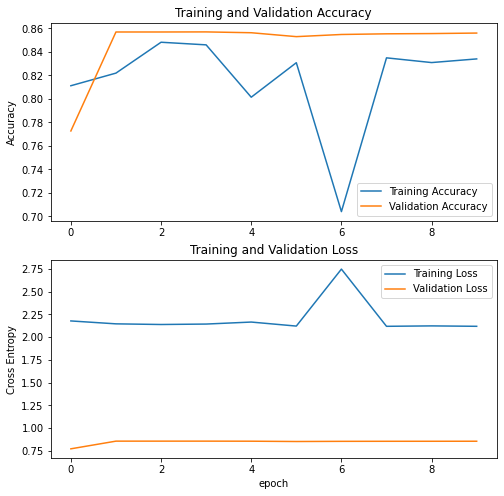

In [91]:
histories={}
histories[1] = history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plot_process(acc, val_acc, loss, val_acc)

In [93]:
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

Number of layers in the base model:  155


In [94]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [95]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
sequential_5 (Sequential)    (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
___________________________________________

In [96]:
len(model.trainable_variables)

58

In [97]:
index = 2
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history = model.fit(train_dataset, 
                    epochs=total_epochs, 
                    initial_epoch=history.epoch[-1], 
                    validation_data=val_dataset)

Epoch 10/20
632/632 [==============================] - 42s 67ms/step - loss: 2.2040 - accuracy: 0.8560 - val_loss: 2.2036 - val_accuracy: 0.8571
Epoch 11/20
632/632 [==============================] - 42s 67ms/step - loss: 2.2036 - accuracy: 0.8571 - val_loss: 2.2036 - val_accuracy: 0.8571
Epoch 12/20
632/632 [==============================] - 42s 67ms/step - loss: 2.2036 - accuracy: 0.8571 - val_loss: 2.2036 - val_accuracy: 0.8571
Epoch 13/20
632/632 [==============================] - 43s 67ms/step - loss: 2.2036 - accuracy: 0.8571 - val_loss: 2.2036 - val_accuracy: 0.8571
Epoch 14/20
632/632 [==============================] - 42s 67ms/step - loss: 2.2035 - accuracy: 0.8571 - val_loss: 2.2036 - val_accuracy: 0.8571
Epoch 15/20
632/632 [==============================] - 42s 67ms/step - loss: 2.2036 - accuracy: 0.8571 - val_loss: 2.2036 - val_accuracy: 0.8571
Epoch 16/20
632/632 [==============================] - 42s 67ms/step - loss: 2.2036 - accuracy: 0.8571 - val_loss: 2.2036 - val_ac

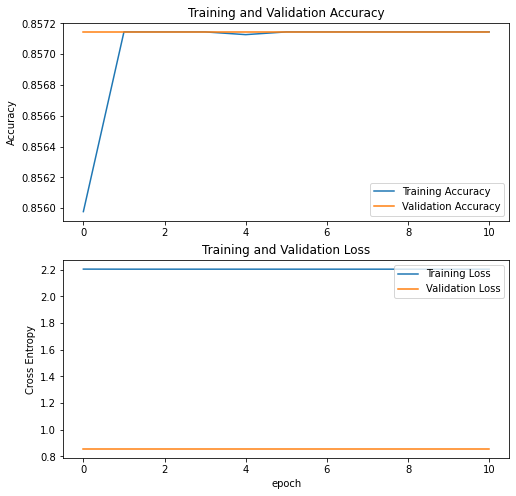

In [98]:
histories[index] = history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
plot_process(acc, val_acc, loss, val_acc)
index += 1

In [102]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.2.0


In [104]:
checkpoint_path = "../training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
print(checkpoint_dir)

../training_1


In [105]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [109]:
fine_tune_epochs = 3
total_epochs =  20
history= histories[2]

history = model.fit(train_dataset, 
                    epochs=total_epochs, 
                    initial_epoch=history.epoch[-1], 
                    validation_data=val_dataset,
                    callbacks=[cp_callback])

Epoch 20/20
631/632 [============================>.] - ETA: 0s - loss: 2.2036 - accuracy: 0.8571
Epoch 00020: saving model to ../training_1/cp.ckpt
632/632 [==============================] - 42s 66ms/step - loss: 2.2036 - accuracy: 0.8571 - val_loss: 2.2036 - val_accuracy: 0.8571


In [110]:
model.save_weights(checkpoint_path)